In [26]:
# example of the test problem
from math import sin
from math import pi
from numpy import arange
from numpy import argmax
from numpy.random import normal, random
import numpy as np
from matplotlib import pyplot

from warnings import catch_warnings
from warnings import simplefilter
from sklearn.gaussian_process import GaussianProcessRegressor
from scipy.stats import norm

Optima: x=0.900, y=0.810


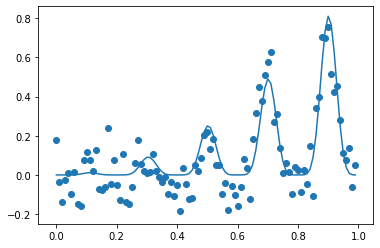

In [2]:
# objective function
def objective(x, noise=0.1):
    noise = normal(loc=0, scale=noise)
    return (x**2 * sin(5 * pi * x)**6.0) + noise
 
# grid-based sample of the domain [0,1]
X = arange(0, 1, 0.01)
# sample the domain without noise
y = [objective(x, 0) for x in X]
# sample the domain with noise
ynoise = [objective(x) for x in X]
# find best result
ix = argmax(y)
print('Optima: x=%.3f, y=%.3f' % (X[ix], y[ix]))
# plot the points with noise
pyplot.scatter(X, ynoise)
# plot the points without noise
pyplot.plot(X, y)
# show the plot
pyplot.show()

In [16]:
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)

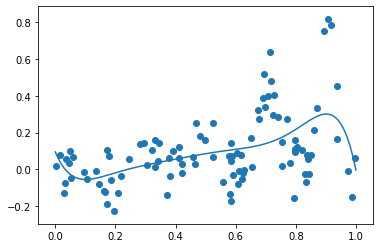

In [22]:
# plot real observations vs surrogate function
def plot(X, y, model):
    # scatter plot of inputs and real objective function
    pyplot.scatter(X, y)
    # line plot of surrogate function across domain
    Xsamples = np.asarray(arange(0, 1, 0.001))
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    ysamples, _ = surrogate(model, Xsamples)
    pyplot.plot(Xsamples, ysamples)
    # show the plot
    pyplot.show()
    
# sample the domain sparsely with noise
X = random(100)
y = np.asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot the surrogate function
plot(X, y, model)

In [34]:
X.shape

(200, 1)

In [42]:
yhat, std = surrogate(model,X)

In [43]:
max(yhat)

array([0.65914536])

In [56]:
yhat[:,0]

array([ 1.19611740e-01,  1.28612518e-01,  1.94629669e-01,  1.04850769e-01,
       -2.64625549e-02, -2.64739990e-02,  1.03807449e-01,  9.99088287e-02,
        1.71680450e-02,  4.35331345e-01,  4.27692413e-01,  6.45675659e-02,
        1.03790283e-01, -2.63500214e-02,  5.94181061e-01,  8.99810791e-02,
        2.27125168e-01,  2.65121460e-04,  1.03982925e-01,  6.47636414e-01,
        2.69641876e-01,  6.23207092e-02,  2.83699036e-02,  5.96370697e-02,
        1.29053116e-01, -2.64816284e-02,  5.49251556e-01, -2.66647339e-02,
        8.51840973e-02, -2.61840820e-02, -1.30672455e-02,  4.74576950e-01,
        1.29287720e-01,  2.24262238e-01,  6.58636093e-01,  9.74082947e-03,
       -1.39904022e-02,  7.43484497e-02,  8.35494995e-02, -1.11846924e-02,
        8.50486755e-02, -2.63538361e-02,  9.76905823e-02,  2.87435532e-01,
        1.15924835e-01,  1.07519150e-01,  8.97998810e-02,  2.81499863e-01,
       -3.34753036e-01,  8.30707550e-02, -2.24742889e-02,  2.82310486e-01,
        8.08429718e-02,  

In [45]:
std.shape

(200,)

In [24]:
# optimize the acquisition function
def opt_acquisition(X, y, model):
    # random search, generate random samples
    Xsamples = random(100)
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    # calculate the acquisition function for each sample
    scores = acquisition(X, Xsamples, model)
    # locate the index of the largest scores
    ix = argmax(scores)
    return Xsamples[ix, 0]

def acquisition(X, Xsamples, model):
    # calculate the best surrogate score found so far
    yhat, _ = surrogate(model, X)
    best = max(yhat)
    # calculate mean and stdev via surrogate function
    mu, std = surrogate(model, Xsamples)
    mu = mu[:, 0]
    # calculate the probability of improvement
    probs = norm.cdf((mu - best) / (std+1E-9))
    return probs

>x=0.902, f()=0.300595, actual=0.772
>x=0.905, f()=0.346085, actual=0.814
>x=0.908, f()=0.388359, actual=0.787
>x=0.900, f()=0.418582, actual=0.800
>x=0.903, f()=0.448212, actual=0.774
>x=0.911, f()=0.474384, actual=0.680
>x=0.921, f()=0.486337, actual=0.449
>x=0.908, f()=0.485236, actual=1.143
>x=0.917, f()=0.525749, actual=0.621
>x=0.908, f()=0.529727, actual=0.640
>x=0.913, f()=0.537725, actual=0.497
>x=0.911, f()=0.535138, actual=0.801
>x=0.886, f()=0.514122, actual=0.631
>x=0.911, f()=0.552515, actual=0.931
>x=0.916, f()=0.570745, actual=0.740
>x=0.929, f()=0.567801, actual=0.347
>x=0.911, f()=0.567651, actual=0.809
>x=0.898, f()=0.564120, actual=0.871
>x=0.931, f()=0.572962, actual=0.282
>x=0.923, f()=0.572420, actual=0.545
>x=0.911, f()=0.576235, actual=0.664
>x=0.922, f()=0.576094, actual=0.546
>x=0.906, f()=0.575323, actual=0.667
>x=0.946, f()=0.511417, actual=-0.044
>x=0.911, f()=0.565128, actual=0.810
>x=0.911, f()=0.572514, actual=0.710
>x=0.913, f()=0.576317, actual=0.642


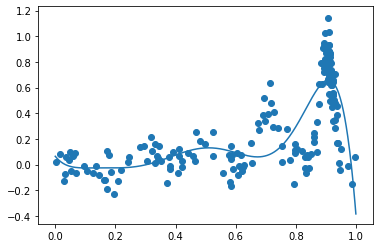

Best Result: x=0.908, y=1.143


In [28]:
# perform the optimization process
for i in range(100):
    # select the next point to sample
    x = opt_acquisition(X, y, model)
    # sample the point
    actual = objective(x)
    # summarize the finding
    est, _ = surrogate(model, [[x]])
    print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
    # add the data to the dataset
    X = np.vstack((X, [[x]]))
    y = np.vstack((y, [[actual]]))
    # update the model
    model.fit(X, y)
# plot all samples and the final surrogate function
plot(X, y, model)
# best result
ix = argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))